<a href="https://colab.research.google.com/github/Moushmi-Sreekanthan/CNN-Image-Classification/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import TensorFlow and other libraries

In [1]:
import tensorflow as tf
import numpy as np

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Download and prepare the fashion_mnist dataset

In [2]:
(training_images, training_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
training_images=training_images.reshape(60000, 28,28, 1)
test_images=test_images.reshape(10000, 28, 28, 1)

In [4]:
# Normalize pixel values to be between o and 1
training_images,test_images=training_images/255.0, test_images/255.0

# Show image data

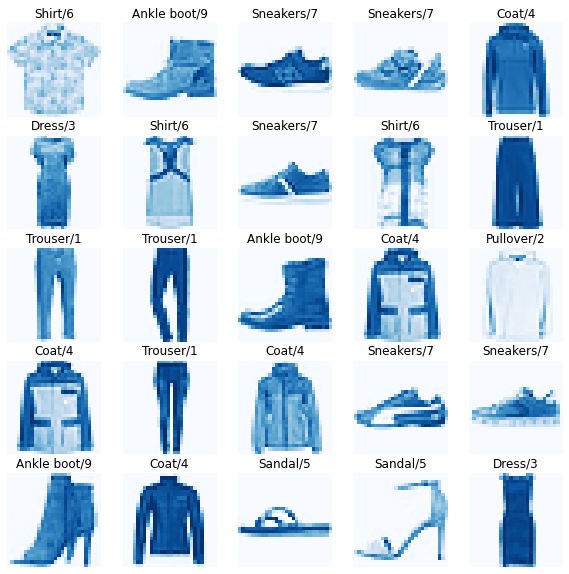

In [10]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneakers','Bag','Ankle boot']

plt.figure(figsize=(10,10))
j=1
for i in np.random.randint(0, 1000, 25):
    plt.subplot(5,5,j); j+=1
    plt.imshow(training_images[i].reshape(28,28), cmap='Blues')
    plt.axis('off')
    plt.title('{}/{}'.format(class_names[training_labels[i]],training_labels[i]))

# Create convolutional base

In [11]:
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
tf.keras.layers.MaxPooling2D(2, 2),
tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
tf.keras.layers.MaxPooling2D(2, 2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(10, activation='softmax')
])

# Plotting neural network work flow

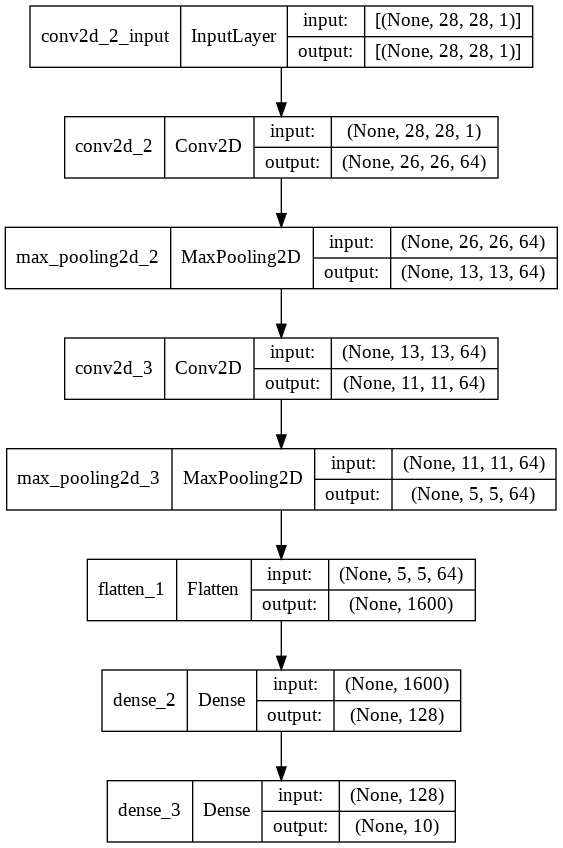

In [12]:
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Display architecture of the model

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

# Compile the model

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model

In [15]:
history = model.fit(training_images, training_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 97s 51ms/step - loss: 0.4351 - accuracy: 0.8430 - val_loss: 0.3562 - val_accuracy: 0.8720
Epoch 2/5
1875/1875 [==============================] - 94s 50ms/step - loss: 0.2952 - accuracy: 0.8907 - val_loss: 0.2977 - val_accuracy: 0.8892
Epoch 3/5
1875/1875 [==============================] - 93s 50ms/step - loss: 0.2512 - accuracy: 0.9067 - val_loss: 0.2740 - val_accuracy: 0.9005
Epoch 4/5
1875/1875 [==============================] - 94s 50ms/step - loss: 0.2190 - accuracy: 0.9173 - val_loss: 0.2588 - val_accuracy: 0.9062
Epoch 5/5
1875/1875 [==============================] - 93s 50ms/step - loss: 0.1928 - accuracy: 0.9273 - val_loss: 0.2492 - val_accuracy: 0.9080


# Evaluate the model

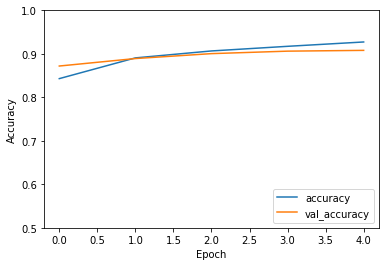

In [16]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')